In [29]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [30]:
def ameliorer_image(image_path):
    # Charger l'image
    image = cv2.imread(image_path)

    # Convertir l'image en niveaux de gris
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    dilate = cv2.dilate(grayscale, kernel, iterations=1)
    erode = cv2.erode(dilate, kernel, iterations=1)

    # Appliquer un seuillage adaptatif pour rendre les caractères plus visibles
    threshold = cv2.adaptiveThreshold(erode, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 45, 20)

    return threshold


In [31]:

def ameliorerr_image(image_path):
    # Charger l'image
    image = cv2.imread(image_path)

    # Convertir l'image en niveaux de gris
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Appliquer un flou gaussien pour réduire le bruit
    blurred = cv2.GaussianBlur(grayscale, (5, 5), 0)
    
    # Appliquer un seuillage pour isoler les caractères
    _, threshold = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Utiliser l'algorithme de Canny pour détecter les contours des caractères
    edges = cv2.Canny(threshold, 100, 200)

    return edges

In [32]:
def extraire_texte(image_path):
    # Améliorer l'image
    image_amelioree = ameliorerr_image(image_path)

    # Utiliser Tesseract OCR pour extraire le texte
    plt.imshow(image_amelioree)
    texte = pytesseract.image_to_string(image_amelioree)

    return texte

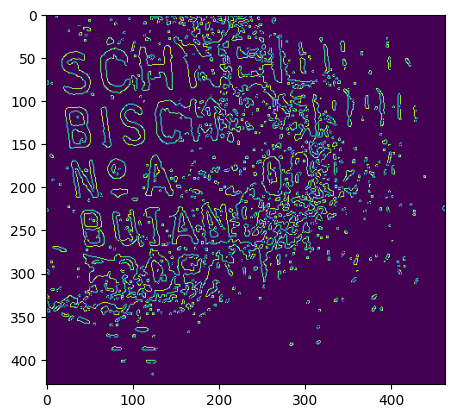

: 

In [33]:
print(extraire_texte(r"C:\Users\Carlt\Documents\phoenix\test\ocr\P6240638.JPG"))
